# Finding the best chocolate bars
Now let's now move on to the competition and challenge.

# 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)



 Download Datasets: https://github.com/Akashpandey1507/DataFiles/blob/main/chocolate_bars.csv

# 💾 The data
Your team created a file with the following information (source):
* "id" - id number of the review
* "manufacturer" - Name of the bar manufacturer
* "company_location" - Location of the manufacturer
* "year_reviewed" - From 2006 to 2021
* "bean_origin" - Country of origin of the cacao beans
* "bar_name" - Name of the chocolate bar
* "cocoa_percent" - Cocoa content of the bar (%)
* "num_ingredients" - Number of ingredients
* "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
* "review" - Summary of most memorable characteristics of the chocolate bar
* "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding
Acknowledgments: Brady Brelinski, Manhattan Chocolate Society

# 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4.  Is the cacao bean's origin an indicator of quality?
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Akashpandey1507/DataFiles/main/chocolate_bars.csv')

In [4]:
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


# Data Cleaning

In [5]:
df.shape

(2530, 11)

In [6]:
df.columns = df.columns.str.title()

In [7]:
df.columns

Index(['Id', 'Manufacturer', 'Company_Location', 'Year_Reviewed',
       'Bean_Origin', 'Bar_Name', 'Cocoa_Percent', 'Num_Ingredients',
       'Ingredients', 'Review', 'Rating'],
      dtype='object')

<Axes: >

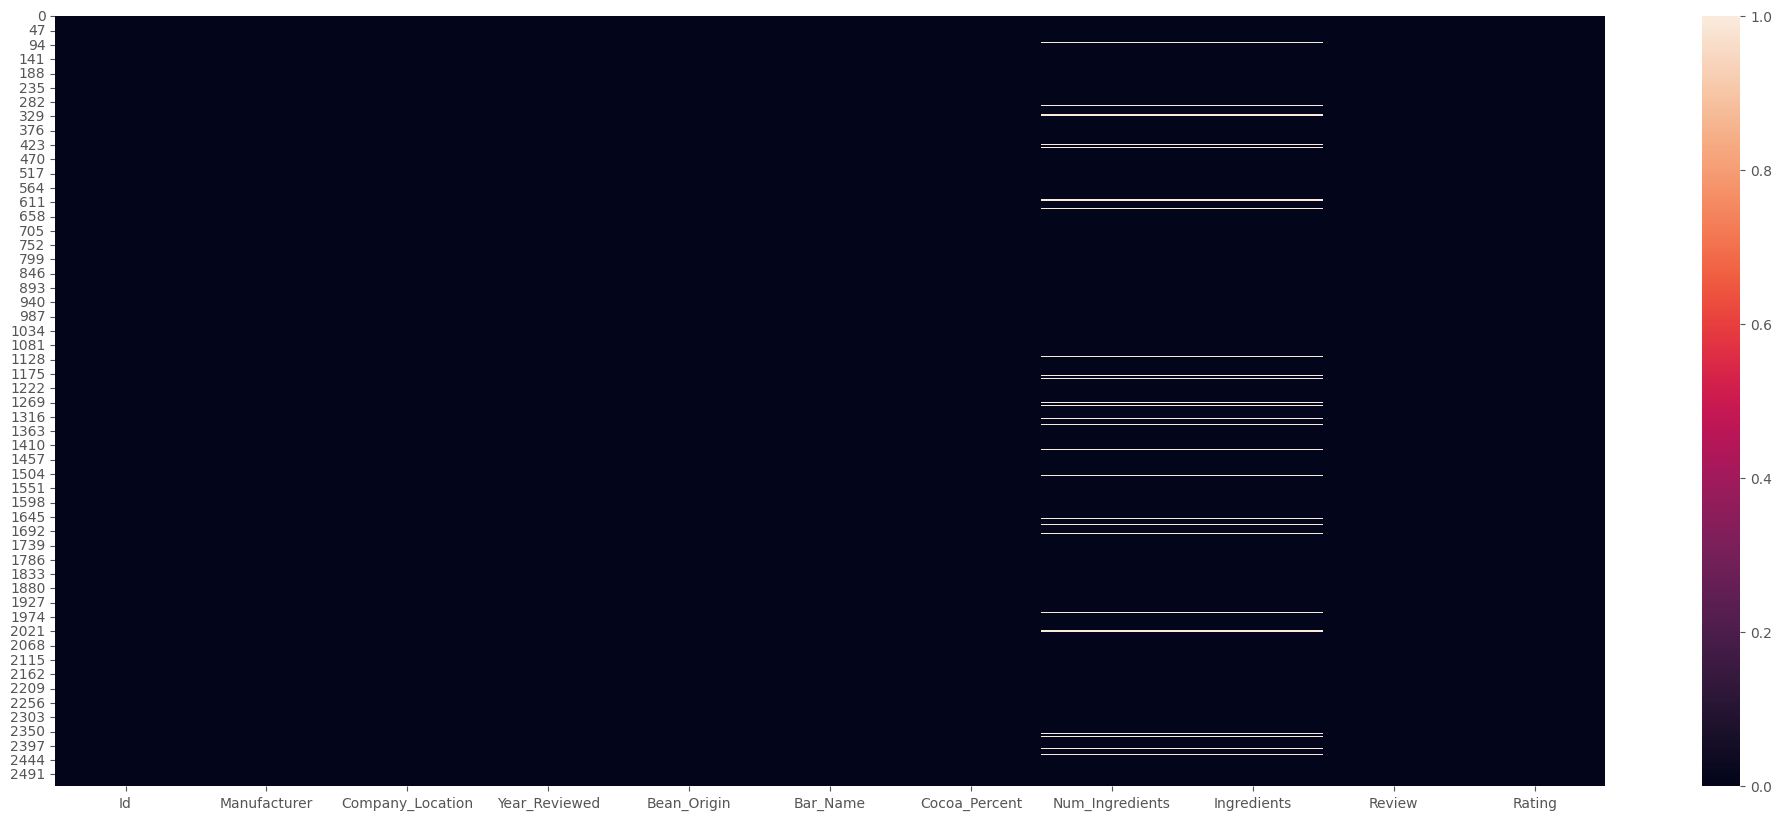

In [8]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Id                   0
Manufacturer         0
Company_Location     0
Year_Reviewed        0
Bean_Origin          0
Bar_Name             0
Cocoa_Percent        0
Num_Ingredients     87
Ingredients         87
Review               0
Rating               0
dtype: int64

In [10]:
null = df['Num_Ingredients'].isna()
df[null].head()

,Id,Manufacturer,Company_Location,Year_Reviewed,Bean_Origin,Bar_Name,Cocoa_Percent,Num_Ingredients,Ingredients,Review,Rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70.0,NaN,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70.0,NaN,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,NaN,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100.0,NaN,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,NaN,NaN,"cardboard, very bitter, floral",1.50


In [11]:
df = df.fillna(0)

<Axes: >

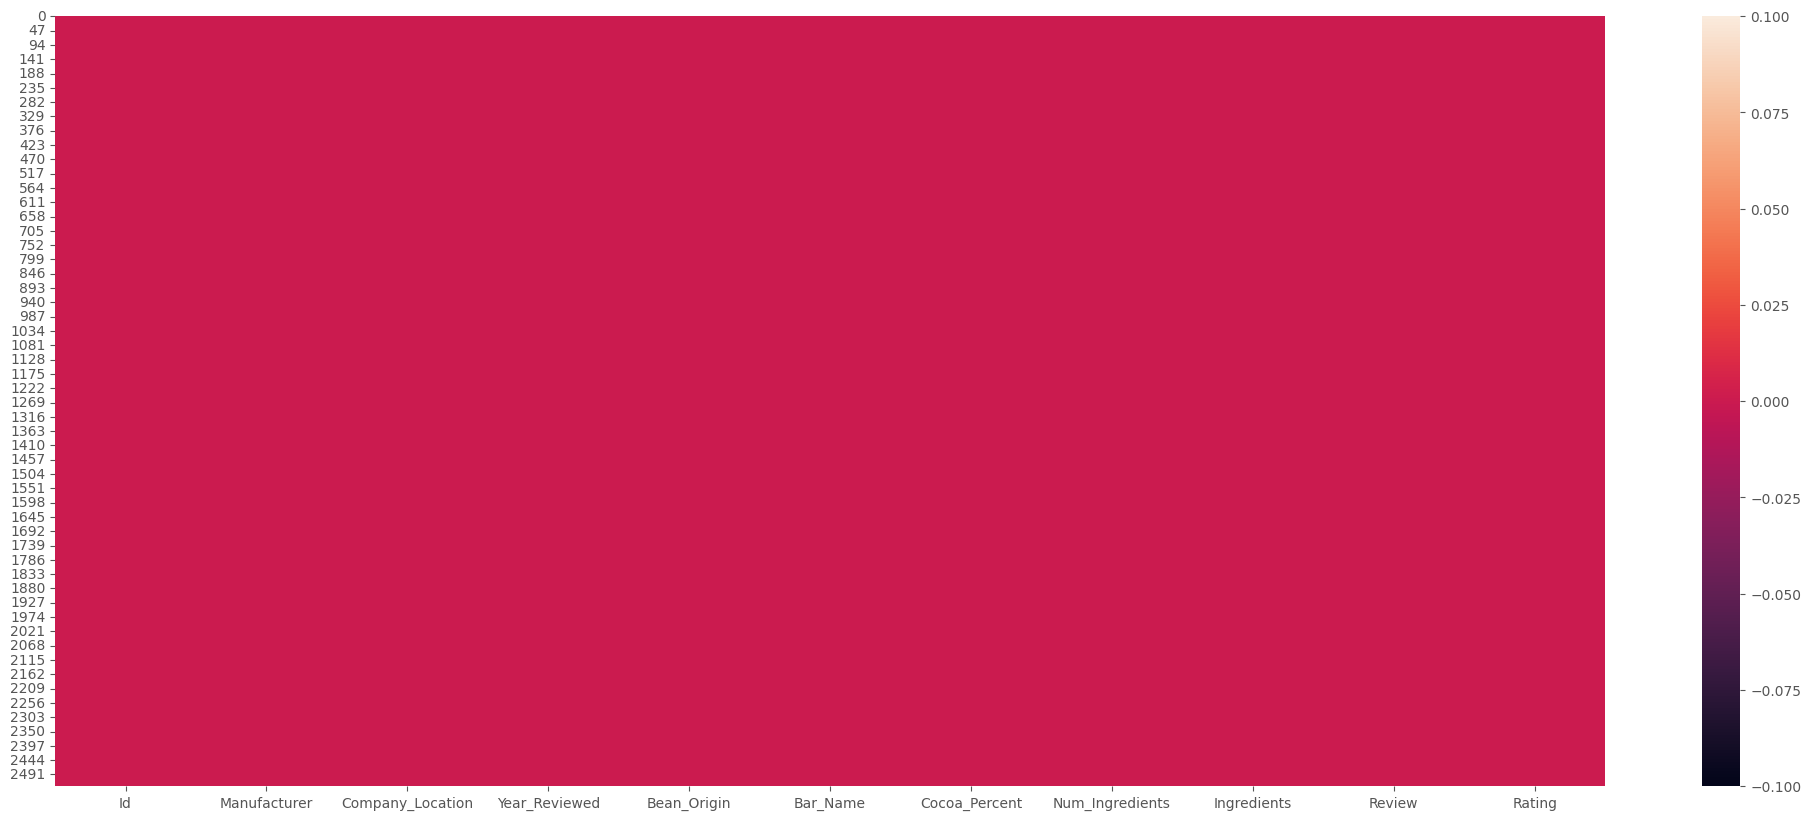

In [12]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull())

# 2.0 Basic Data Exploration.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2530.0,1429.800791,757.648556,5.0,802.0,1454.00,2079.0,2712.0
Year_Reviewed,2530.0,2014.374308,3.968267,2006.0,2012.0,2015.00,2018.0,2021.0
Cocoa_Percent,2530.0,71.639723,5.616724,42.0,70.0,70.00,74.0,100.0
Num_Ingredients,2530.0,2.936759,1.055195,0.0,2.0,3.00,4.0,6.0
Rating,2530.0,3.196344,0.445321,1.0,3.0,3.25,3.5,4.0


C:\Users\rg67266\AppData\Local\Temp\ipykernel_17872\1505863148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Cocoa_Percent, bins=30)


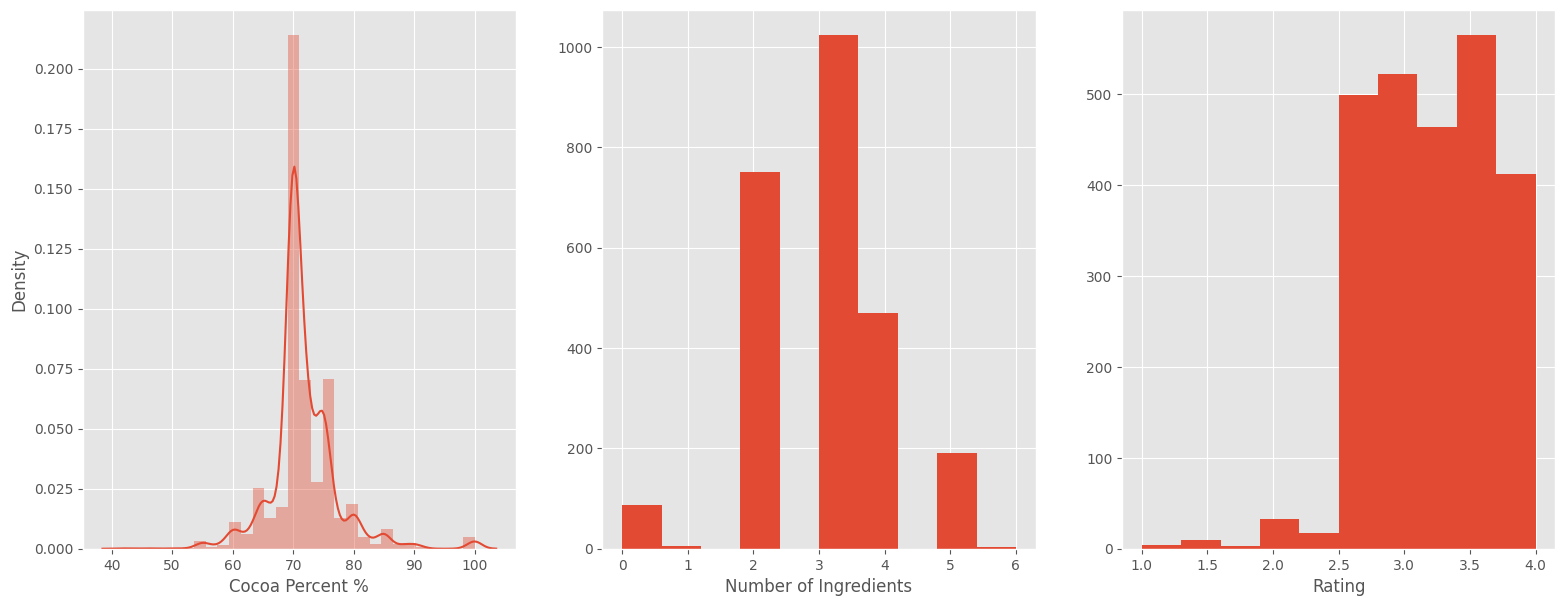

In [14]:
plt.figure(figsize=(19, 7))

plt.subplot(131)
sns.distplot(df.Cocoa_Percent, bins=30)
plt.xlabel('Cocoa Percent %')

plt.subplot(132)
df.Num_Ingredients.hist()
plt.xlabel('Number of Ingredients')

plt.subplot(133)
df.Rating.hist()
plt.xlabel('Rating');

# Which is the biggest bean importer worldwide?

In [15]:
importer = df['Bean_Origin'].value_counts().reset_index().nlargest(20,'count')
importer

,Bean_Origin,count
0,Venezuela,253
1,Peru,244
2,Dominican Republic,226
3,Ecuador,219
4,Madagascar,177
5,Blend,156
6,Nicaragua,100
7,Bolivia,80
8,Tanzania,79
9,Colombia,79


<Axes: xlabel='Bean_Origin', ylabel='count'>

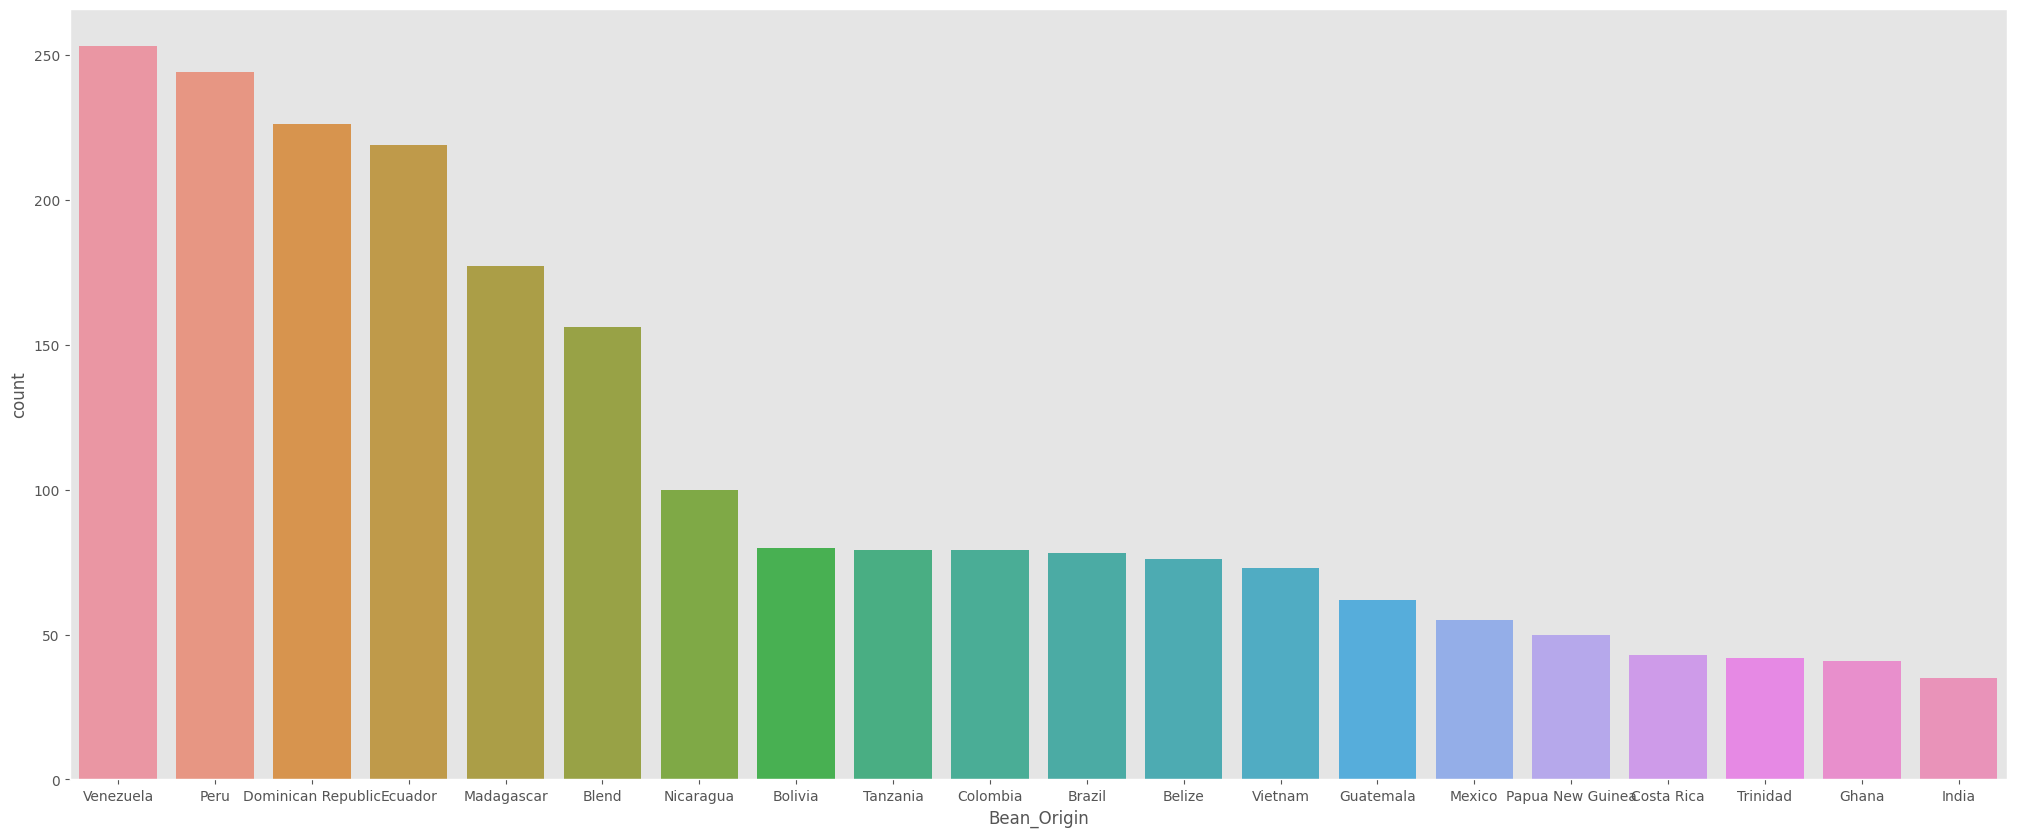

In [16]:

plt.figure(figsize=(25,10))

plt.grid()
sns.barplot(data=importer,x='Bean_Origin',y='count')

In [17]:
means = df.groupby('Bean_Origin')['Rating'].mean().round(1).reset_index().nlargest(10, 'Rating')
means

,Bean_Origin,Rating
54,Tobago,3.6
7,China,3.5
42,Sao Tome & Principe,3.5
44,Solomon Islands,3.4
4,Brazil,3.3
9,Congo,3.3
11,Cuba,3.3
20,Guatemala,3.3
21,Haiti,3.3
28,Madagascar,3.3


<Axes: xlabel='Bean_Origin', ylabel='Rating'>

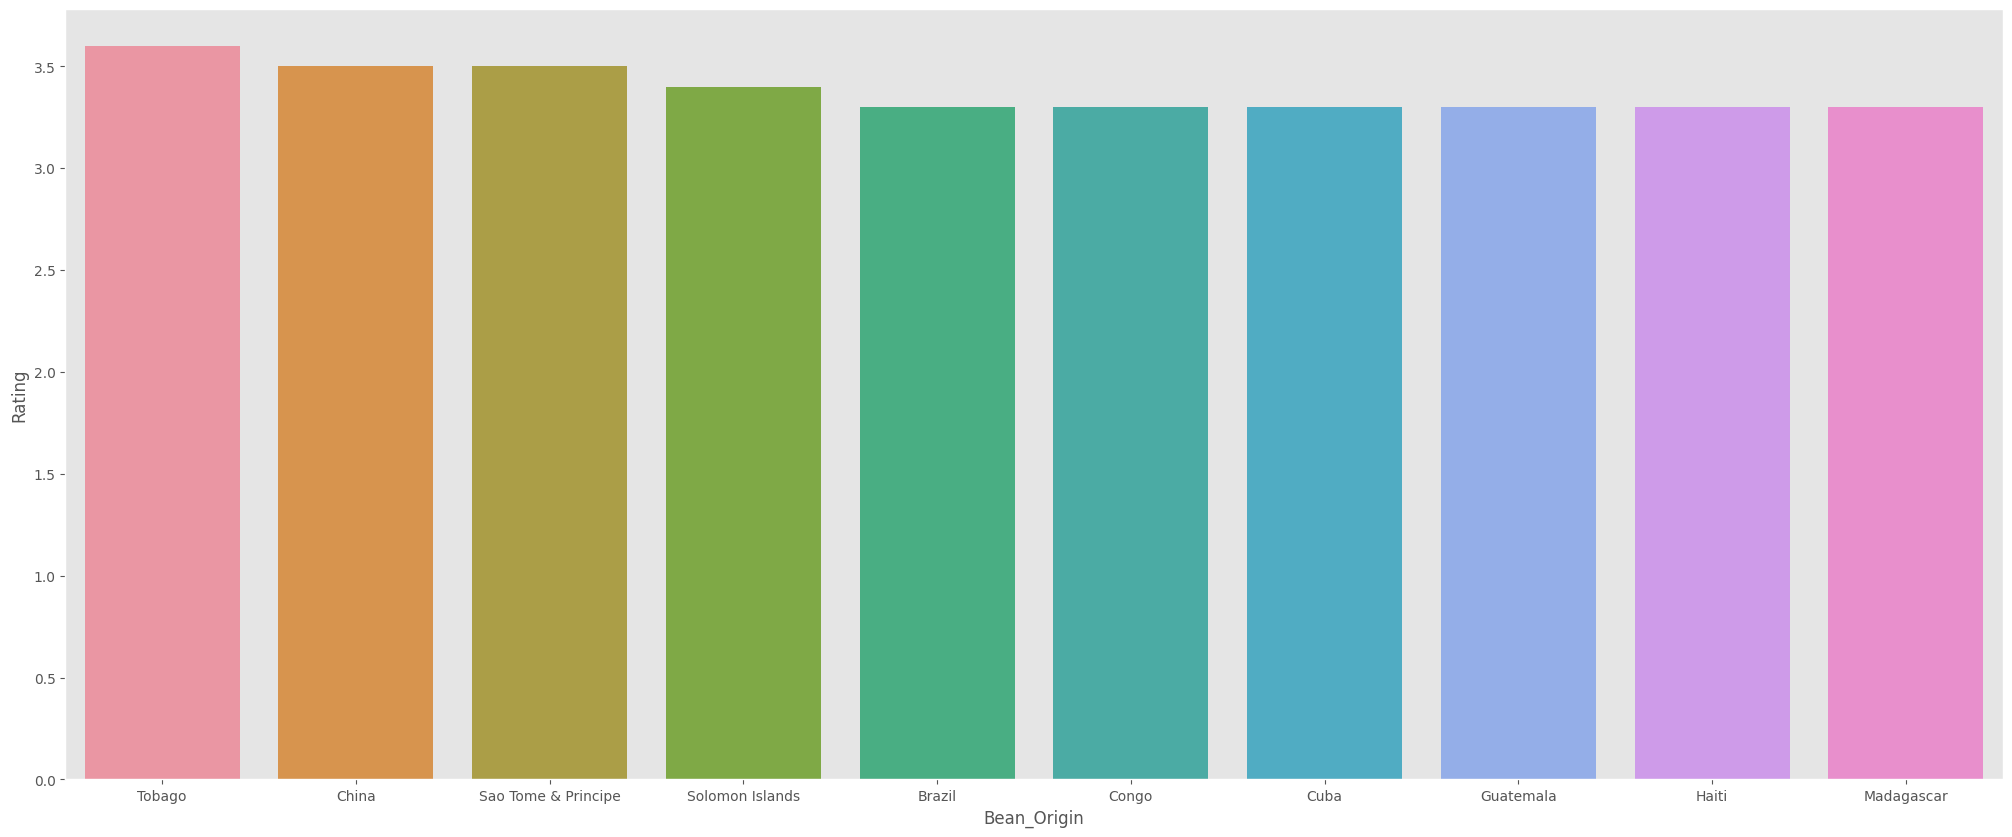

In [18]:

plt.figure(figsize=(25,10))
plt.grid()
sns.barplot(data=means,x='Bean_Origin',y='Rating')

In [19]:
means1 = df.groupby('Bean_Origin')['Rating'].mean().round(1).reset_index().nsmallest(10, 'Rating')
means1

,Bean_Origin,Rating
39,Puerto Rico,2.7
30,Martinique,2.8
38,Principe,2.8
43,Sierra Leone,2.8
47,St.Vincent-Grenadines,2.8
25,Ivory Coast,2.9
45,Sri Lanka,2.9
51,Taiwan,2.9
2,Blend,3.0
5,Burma,3.0


<Axes: xlabel='Bean_Origin', ylabel='Rating'>

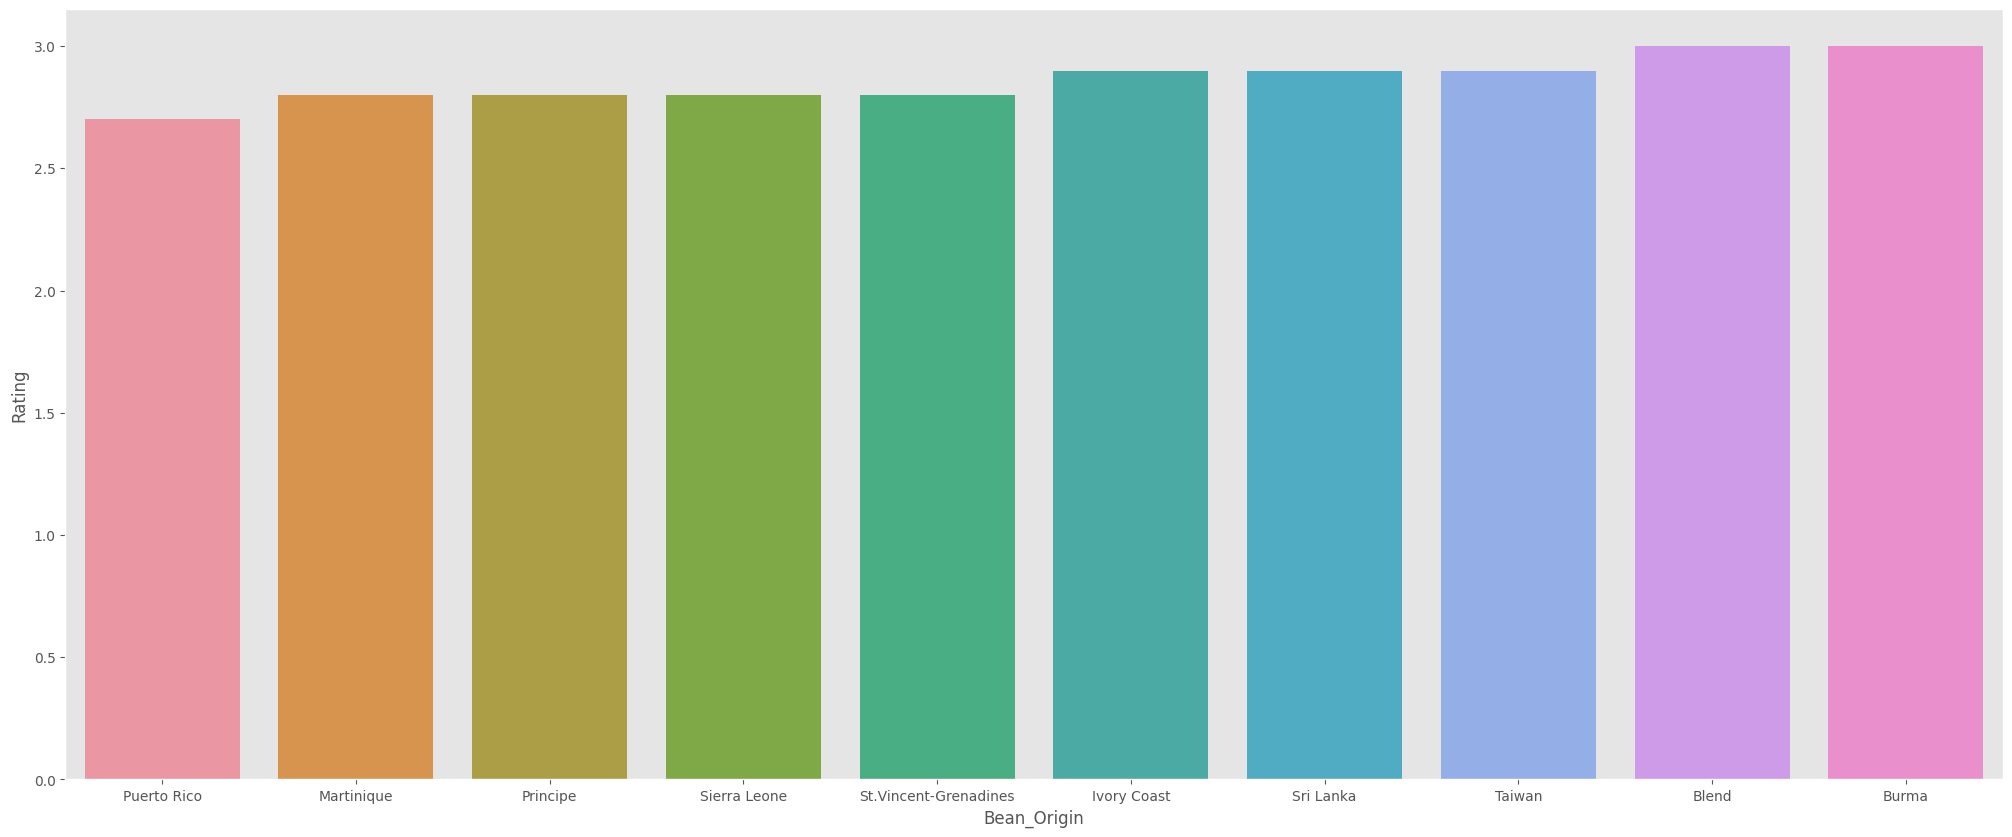

In [20]:
plt.figure(figsize=(25,10))
plt.grid()
sns.barplot(data=means1,x='Bean_Origin',y='Rating')

# Observation
* Average rating of the chocolate bar is highest for the country Tobago
* Average rating of the chocolate bar is lowest for the country Puerto Rico

#  Chocolate bars reviewed for each of those countries

In [21]:
dfr=(df.
        groupby("Bean_Origin").
        Bar_Name.count().
        reset_index().
        nlargest(10,'Bar_Name')
)
dfr

,Bean_Origin,Bar_Name
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
2,Blend,156
32,Nicaragua,100
3,Bolivia,80
8,Colombia,79
52,Tanzania,79


<Axes: xlabel='Bean_Origin', ylabel='Bar_Name'>

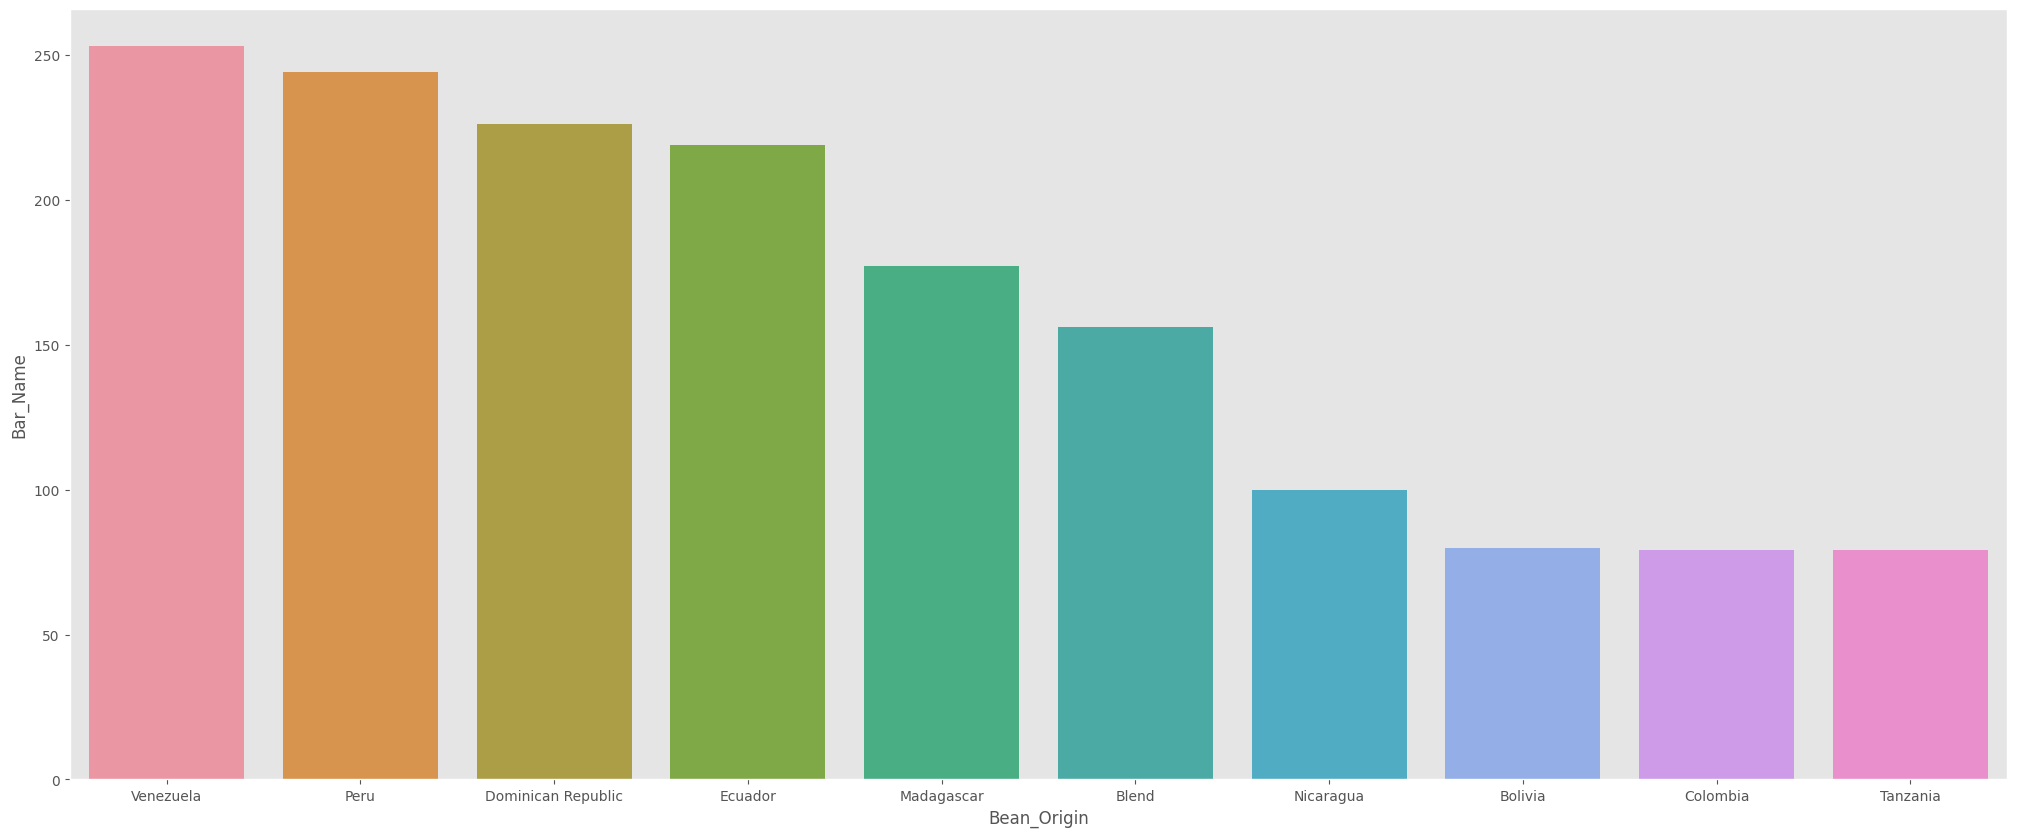

In [22]:
plt.figure(figsize=(25,10))
plt.grid()
sns.barplot(data=dfr,x='Bean_Origin',y='Bar_Name')

In [23]:
dfr1=(df.
        groupby("Bean_Origin").
        Bar_Name.count().
        reset_index().
        nsmallest(10,'Bar_Name')
)
dfr1

,Bean_Origin,Bar_Name
5,Burma,1
7,China,1
12,DR Congo,1
17,Gabon,1
30,Martinique,1
38,Principe,1
47,St.Vincent-Grenadines,1
48,Sulawesi,1
49,Sumatra,1
50,Suriname,1


<Axes: xlabel='Bean_Origin', ylabel='Bar_Name'>

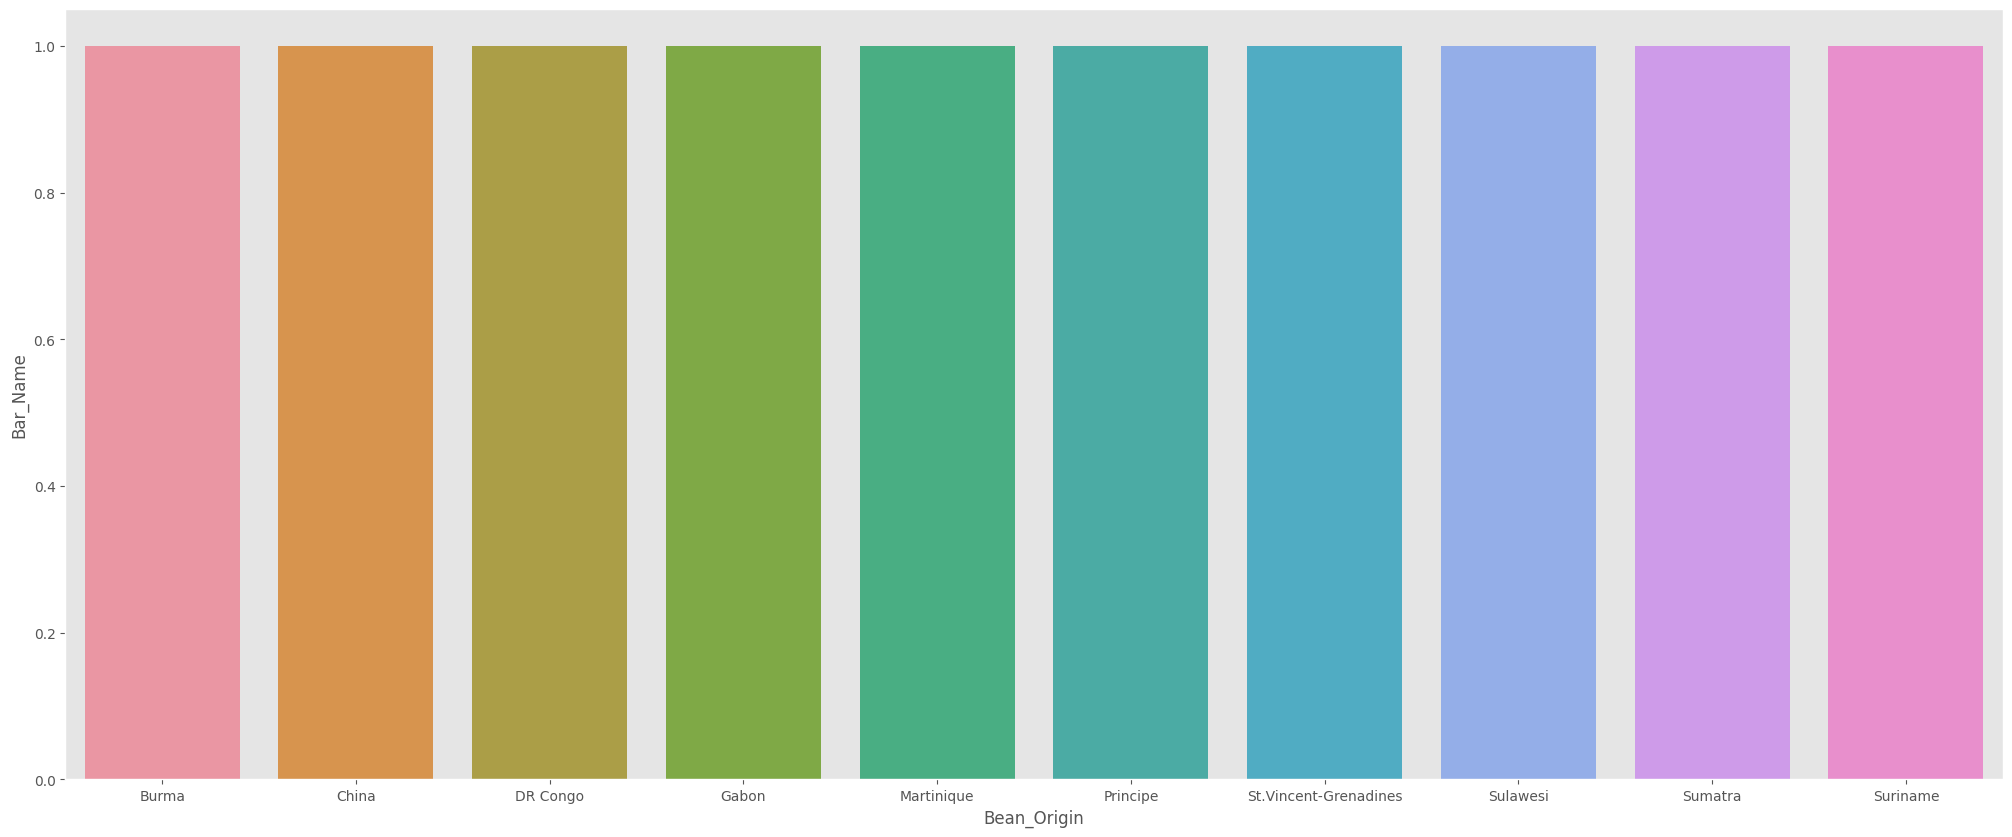

In [24]:
plt.figure(figsize=(25,10))
plt.grid()
sns.barplot(data=dfr1,x='Bean_Origin',y='Bar_Name')

# Observatiom
 * Highest numbers of bars were reviewed for the country Venezulea

# Is the cocoa bean's origin an indicator of quality?

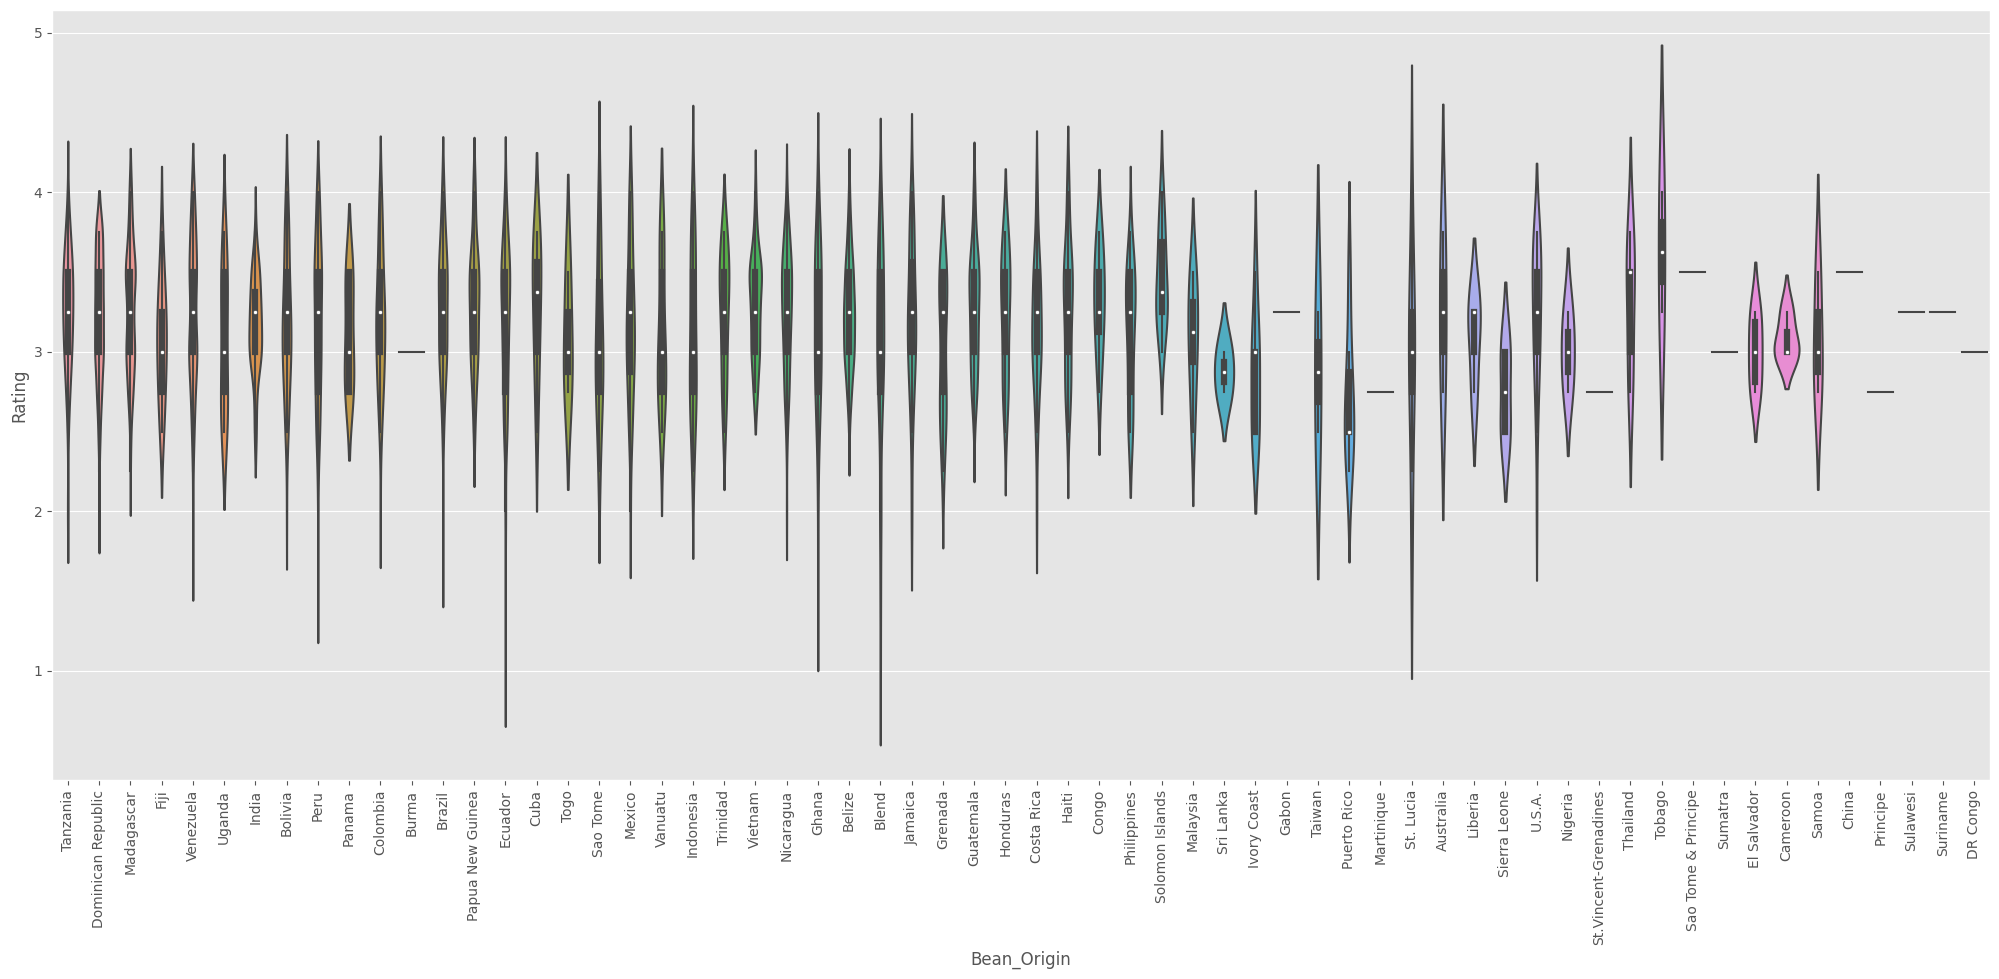

In [25]:
plt.figure(figsize=(25,10))
sns.violinplot(y="Rating",x="Bean_Origin",data=df)
plt.xticks(rotation=90)
plt.show()

# Observation
* Cocoa bean's origin is not an indicator of quality

# How does cocoa content relate to rating


C:\Users\rg67266\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rg67266\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rg67266\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rg67266\AppData\Local\Pac

<Axes: xlabel='Rating', ylabel='Cocoa_Percent'>

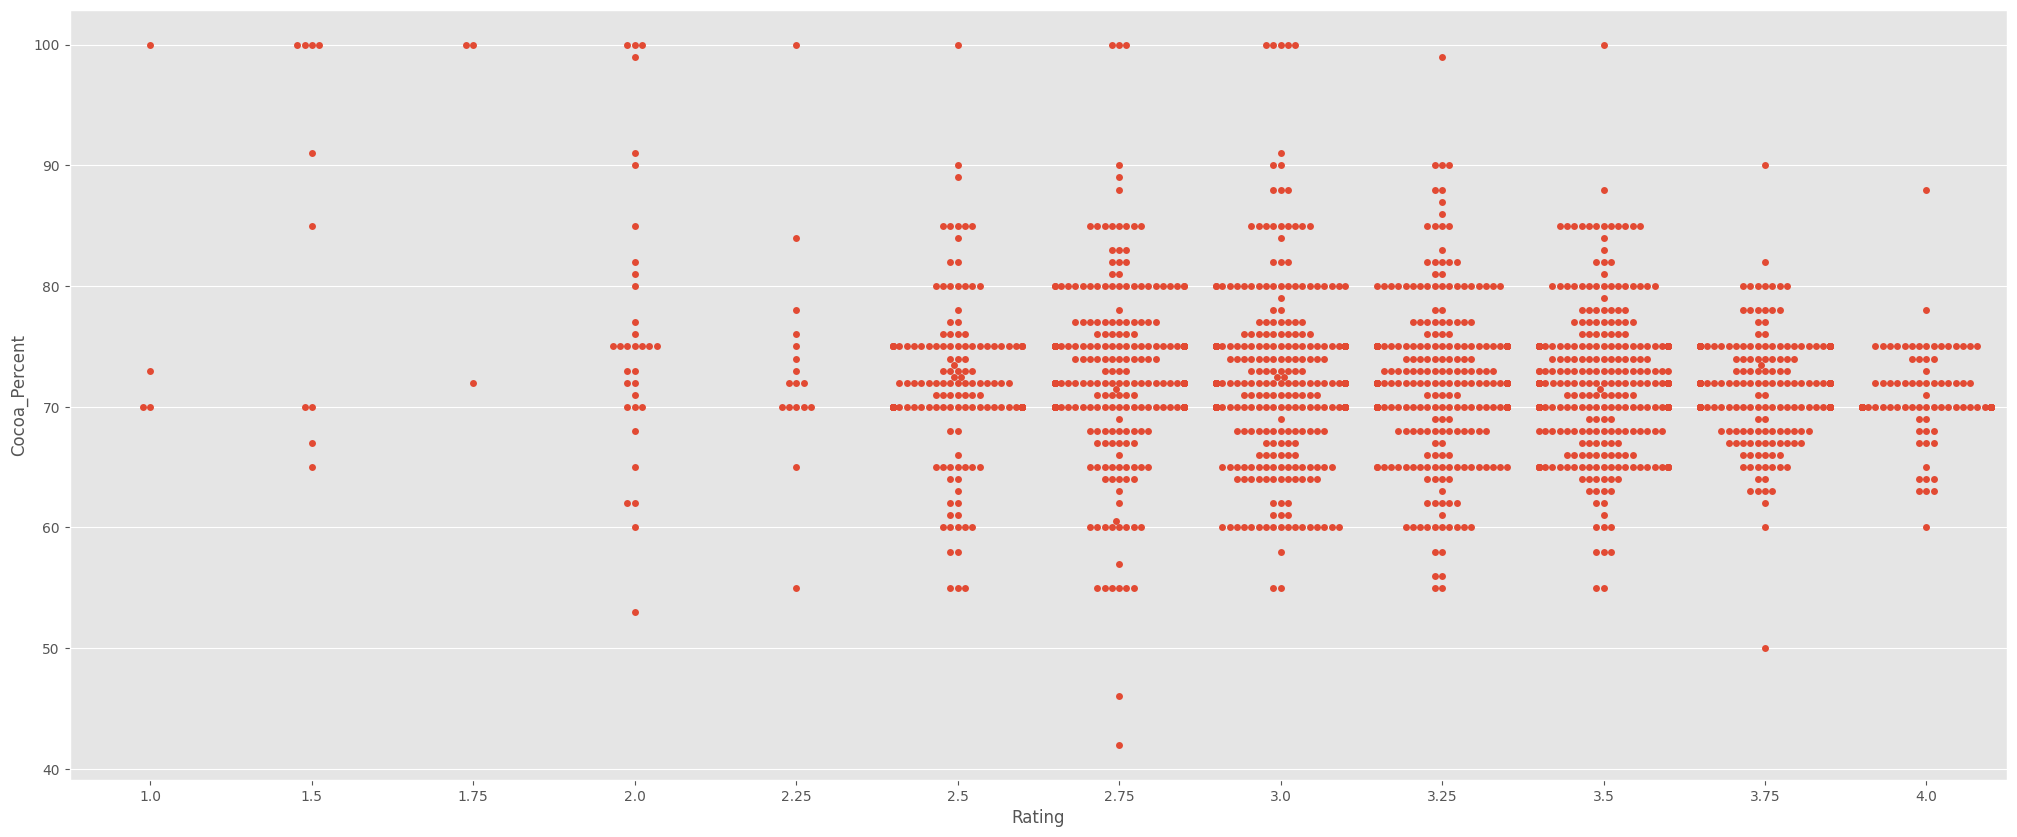

In [26]:
plt.figure(figsize=(25,10))

sns.swarmplot(x="Rating",y="Cocoa_Percent",data=df)

# Observation:
* "cocoa_percent" and "rating" is not correlated.

# What is the average cocoa content for bars with higher ratings?


In [27]:
df.loc[df['Rating']>=3.5].Cocoa_Percent.mean().round(3)

71.108

In [28]:
df

,Id,Manufacturer,Company_Location,Year_Reviewed,Bean_Origin,Bar_Name,Cocoa_Percent,Num_Ingredients,Ingredients,Review,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25
